In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
# Step 2: Load Framingham Dataset
df = pd.read_csv('framingham.csv')

In [43]:
#df_numeric = df.select_dtypes(include='number')

# Step 5: Impute missing values with median
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

In [44]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [45]:
linked = linkage(df_scaled, method='ward')

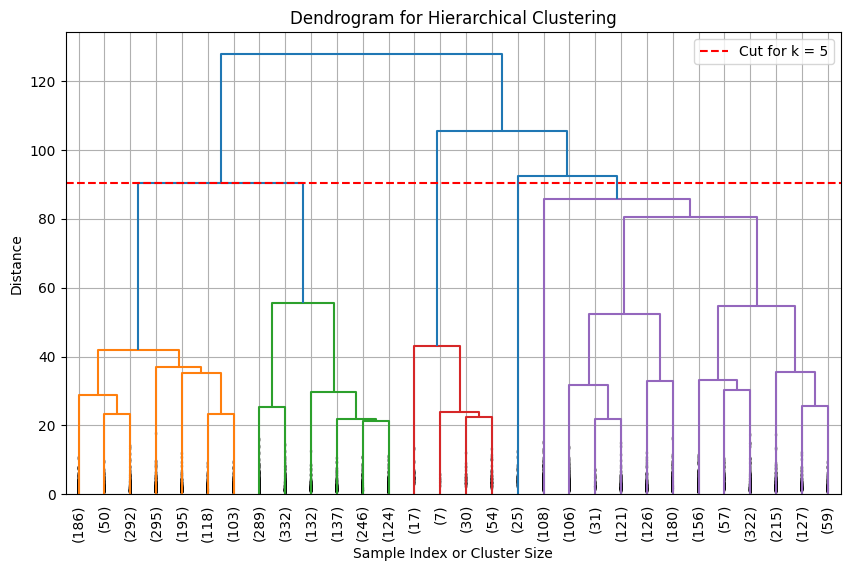

In [50]:
from scipy.cluster.hierarchy import fcluster

# Step 1: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')

# Step 2: Add horizontal cut line to form k clusters (e.g., k=3)
k = 5
max_d = linked[-(k-1), 2]  # Get the distance at which to cut for k clusters
plt.axhline(y=max_d, color='red', linestyle='--', label=f'Cut for k = {k}')
plt.legend()

plt.grid(True)
plt.show()



In [51]:

# Apply Agglomerative Clustering with updated parameter name
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(df_scaled)

In [52]:
# Step 9: Add cluster labels to DataFrame
df_imputed['cluster'] = cluster_labels

In [53]:
print(df_imputed.head(10))

   male   age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   1.0  39.0        4.0            0.0         0.0     0.0              0.0   
1   0.0  46.0        2.0            0.0         0.0     0.0              0.0   
2   1.0  48.0        1.0            1.0        20.0     0.0              0.0   
3   0.0  61.0        3.0            1.0        30.0     0.0              0.0   
4   0.0  46.0        3.0            1.0        23.0     0.0              0.0   
5   0.0  43.0        2.0            0.0         0.0     0.0              0.0   
6   0.0  63.0        1.0            0.0         0.0     0.0              0.0   
7   0.0  45.0        2.0            1.0        20.0     0.0              0.0   
8   1.0  52.0        1.0            0.0         0.0     0.0              0.0   
9   1.0  43.0        1.0            1.0        30.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           0.0       0.0    195.0  106.

In [54]:
df_imputed['cluster'].value_counts()

cluster
1    2499
0    1633
2     108
Name: count, dtype: int64

In [33]:
# Step 10: PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels


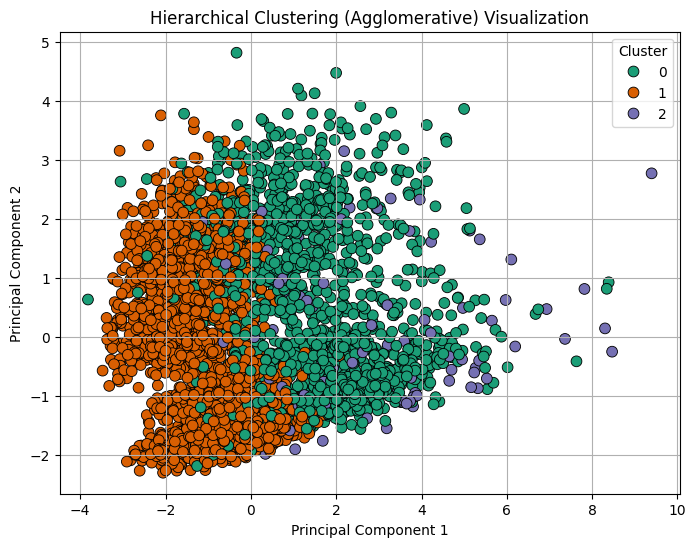

In [55]:

# Step 11: Plot Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Dark2', s=60, edgecolor='k')
plt.title('Hierarchical Clustering (Agglomerative) Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()